In [23]:
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest

In [24]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [25]:
# 상관관계 분석 패키지
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [27]:
# CSV 파일 불러오기
df = pd.read_csv('data.csv')

In [9]:
# 습도(inHd)데이터 전처리
# 숫자 0으로 표기된 데이터를 결측치로 만들기 위해 nan으로 바꾸는 작업
df['inHd'].replace(0, np.nan)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
84835   NaN
84836   NaN
84837   NaN
84838   NaN
84839   NaN
Name: inHd, Length: 84840, dtype: float64

In [28]:
# inHd 열의 결측치를 해당 열의 평균값으로 대체
df['inHd'].fillna(df['inTp'].mean())


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
84835    0.0
84836    0.0
84837    0.0
84838    0.0
84839    0.0
Name: inHd, Length: 84840, dtype: float64

In [29]:
# 처리된 데이터를 출력 (선택사항)
print(df.head())  # 처음 몇 개 행 출력

    frmDist      date  inTp  inHd  otmsuplyqy  acSlrdQy  cunt   ph  outTp  \
0  DBSF1059  20220926   0.0   0.0         0.0       0.0   0.0  0.0    0.0   
1  DBSF1059  20221001   0.0   0.0         0.0       0.0   0.0  0.0    0.0   
2  DBSF1059  20221002   0.0   0.0         0.0       0.0   0.0  0.0    0.0   
3  DBSF1059  20221003   0.0   0.0         0.0       0.0   0.0  0.0    0.0   
4  DBSF1059  20221004   0.0   0.0         0.0       0.0   0.0  0.0    0.0   

   outWs  ...  outtrn_cumsum   WaterUsage   WaterCost  FertilizerUsage  \
0    0.0  ...            0.0     0.000000    0.000000         0.000000   
1    0.0  ...            0.0  1347.554178  202.133127      4711.308821   
2    0.0  ...            0.0    69.899353   10.484903       271.379890   
3    0.0  ...            0.0   412.225065   61.833760      1539.505534   
4    0.0  ...            0.0   590.608634   88.591295      2614.973165   

   FertilizerCost     CO2Usage    CO2Cost  MistUsageTime    Mist Cost  \
0        0.000000  

In [11]:
# 습도 데이터만 추출 (가정: 'inHd'라는 이름의 컬럼에 습도 데이터가 있음)
humidity_data = df[['inHd']]

In [30]:
# 결측치를 평균값으로 대체
imputer = SimpleImputer(strategy='mean')
humidity_data_imputed = imputer.fit_transform(humidity_data)

# Isolation Forest 모델 초기화 및 학습
# contamination 파라미터는 이상치 비율을 설정 예를 들어, 0.01은 이상치가 전체 데이터의 1%라는 가정
iso_forest = IsolationForest(contamination=0.01)
iso_forest.fit(humidity_data_imputed)

IsolationForest(contamination=0.01)

In [31]:
# 이상치 판별
# predict 메서드를 호출하여 각 데이터 포인트가 정상인지 이상치인지 판별합니다.
# 출력값이 1이면 정상, -1이면 이상치입니다.
labels = iso_forest.predict(humidity_data_imputed)

In [32]:
# 결과를 데이터프레임에 추가
df['anomaly'] = labels

In [33]:
# anomaly 컬럼을 업데이트하여 inHd가 60 이하인 경우는 정상(1)으로 표시
# 이상치의 판정은 우리가 원하는 부분만 따로 설정할수 없으므로 습도가 낮은 부분(60이하)은 이상치에서 제거
df.loc[(df['anomaly'] == -1) & (df['inHd'] <= 60), 'anomaly'] = 1

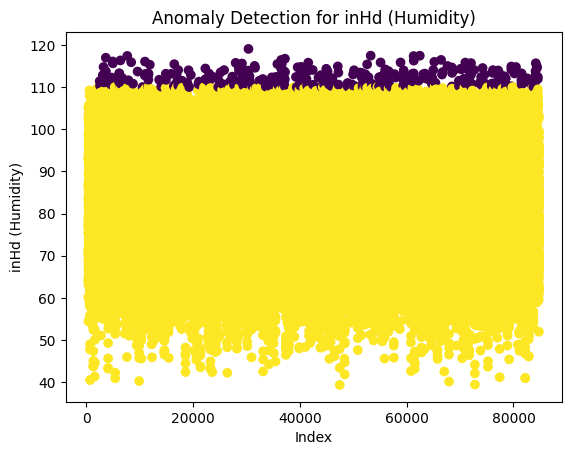

In [20]:
# 이상치와 정상치를 구분하여 그래프로 그리기
plt.scatter(df.index, df['inHd'], c=df['anomaly'])
plt.xlabel('Index')
plt.ylabel('inHd (Humidity)')
plt.title('Anomaly Detection for inHd (Humidity)')
plt.show()

In [34]:
# 이상치 데이터만 필터링하여 출력
# 'anomaly'에는 이상치에 대한 값이 저장되어 있음 -1은 이상치를 의미
anomalies = df[df['anomaly'] == -1]
print("Anomalies in inHd (Humidity):")
print(anomalies)

Anomalies in inHd (Humidity):
        frmDist      date       inTp        inHd  otmsuplyqy    acSlrdQy  \
2064   DBSF1386  20170905  22.397963  109.743960  145.949975  234.023927   
2495   DBSF1466  20181005  18.458259  111.407743  142.433211  237.292700   
2554   DBSF1466  20181203  14.080394  110.321257   94.113238  240.914156   
2859   DBSF1490  20170927  17.749673  110.840975   78.968997    0.000000   
3067   DBSF1490  20180423  14.785132  112.832559  129.029624    0.000000   
...         ...       ...        ...         ...         ...         ...   
84374  DBSF9961  20180319  15.498970  114.928953    7.703800  376.417828   
84418  DBSF9961  20180502  22.515222  112.101475   23.564660  419.974041   
84428  DBSF9961  20180512  20.211392  114.599413   24.602015  268.669602   
84563  DBSF9969  20171011  23.375903  112.421094  167.372134  411.691258   
84564  DBSF9969  20171012  18.822055  111.927943  150.424888  319.691081   

           cunt        ph      outTp     outWs  ...  Wate

In [35]:
# 앞서 만든 'anomaly' 컬럼이 있는 데이터프레임 df를 새로운 CSV 파일로 저장
df.to_csv('data_anomaly_InHd.csv', index=False)